<h1 align="center">Twitter Sentiment Analysis - ANN Building: DL</h1>

## 🎯 **Learning Objectives**
By the end of this workbook, you will understand:
- How to prepare text data for deep learning models
- Building and training Artificial Neural Networks (ANNs) for text classification
- Recognizing and addressing overfitting in neural networks
- Using TensorFlow/Keras for sentiment analysis

**📚 Key Concepts:** Neural Networks, Text Vectorization, Label Encoding, Model Evaluation

## <h2 align = "center">Dependencies</h2>

**💡 Concept:** We import all necessary libraries at the beginning. Each library serves a specific purpose in our machine learning pipeline.

In [3]:
# TODO: Import the necessary libraries for data manipulation and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical visualization

# TODO: Import scikit-learn components for preprocessing and model evaluation
from sklearn.preprocessing import LabelEncoder  # Hint: We need to encode text labels to numbers
from sklearn.model_selection import train_test_split  # Hint: We need to split our data
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.feature_selection import SelectKBest, f_classif  # For feature selection

# Deep Learning imports - TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential  # For building sequential neural networks
from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping  # Training callbacks
from tensorflow.keras.layers import *  # All layer types (Dense, Dropout, etc.)
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Utility imports
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Display plots inline in Jupyter
%matplotlib inline
sns.set()  # Set seaborn default styling

# Check TensorFlow setup
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
gpus = tf.config.list_physical_devices('GPU')
print("GPU is", "available" if gpus else "NOT AVAILABLE")

Version:  2.20.0
Eager mode:  True
GPU is NOT AVAILABLE


**🔽 Dropdown Hint for TODO above:**
<details>
<summary>Click to see the missing imports</summary>

```python
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
```
</details>

In [4]:
# 🔧 OPTIONAL/ADVANCED: GPU device detection
# This code checks if GPU is available for faster training
# You can skip this section if you're running on CPU

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [5]:
# TODO: Load the cleaned dataset from the EDA (Exploratory Data Analysis) step
# The dataset should contain tweets with their sentiment labels

df = pd.read_csv('../data/cleaned_tweets.csv')

# Display a random sample to understand our data
df.sample(7)

,textID,text,selected_text,sentiment,clean_text
12623,d251997685,Going to get my blood taken,Going to get my blood taken,neutral,going get blood take
12688,2aff0dfbff,Homey missed da bus.,Homey missed da bus.,neutral,Homey miss da bus
14943,04aaabac04,speechless,speechless,neutral,speechless
12538,5dfae5c7cc,man i **** up that test playing cod now . 31 ...,man i **** up,negative,man test play cod 31 day till summer !
7699,cf9f488303,o snapppp look who i found on twitter lollll,o snapppp look who i found on twitter lollll,neutral,snapppp look find twitter lollll
11734,875f821b10,I hope you get well soon! <3,I hope you get well soon! <3,positive,hope get well soon ! 3
1265,f17e12be38,I don`t think I`ve ever been up this early on ...,I don`t think I`ve ever been up this early on ...,neutral,` think ` ever early Sunday Meanwhile bigweeke...


> **📊 Binarize the sentiment column**

**💡 Concept:** Neural networks work with numbers, not text. We need to convert sentiment labels (like 'positive', 'negative', 'neutral') into numerical format (0, 1, 2).

In [6]:
# First, let's see what sentiment categories we have
df.sentiment.value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

In [7]:
# TODO: Create a LabelEncoder to convert text labels to numbers
le = LabelEncoder()

# TODO: Apply label encoding to the sentiment column
df['sentiment'] = le.fit_transform(df['sentiment'])
df.sample(7)

,textID,text,selected_text,sentiment,clean_text
9164,603045ab40,`s mum asked us to thank you for introducing ...,thank,2,` mum ask we thank introduce we Kenny ` ` moth...
10873,926b9f20f6,first year in ages where i`m not going to the ...,i don`t even like,0,first year age ` go crafty raft ` mind though ...
2246,c390bbe5c9,"The time in Germany went by too fast, only 2 d...",Hopefully I will move here soon,2,time Germany go fast 2 day leave hopefully mov...
24211,28f02419f9,i hope you feel better,i hope you feel better,2,hope feel well
16789,b5e3b51d4c,"MC, happy mother`s day to your mom ;).. love yah","MC, happy mother`s day to your mom ;).. love yah",2,MC happy mother ` day mom love yah
1900,01297393b5,oh gaha no of course i wasn`t offended why wo...,d love,2,oh gaha course ` offend would ? ` love play day
25591,5cd2d151d7,_C I can`t find the original on blip.fm and th...,_C I can`t find the original on blip.fm and th...,0,c ` find original blip fm Ex Models version much


**🔽 Dropdown Hint:**
<details>
<summary>Click for help with LabelEncoder</summary>

```python
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
```

**Explanation:** 
- `LabelEncoder()` creates an encoder object
- `fit_transform()` learns the mapping and applies it in one step
</details>

In [8]:
# Check the encoded values
df.sentiment.value_counts()

sentiment
1    11117
2     8582
0     7781
Name: count, dtype: int64

In [9]:
# TODO: Examine the label mapping to understand which number represents which sentiment
le.classes_  # Shows the original class names
num_classes = len(le.classes_)

# Create a mapping dictionary for reference
class_mapping = dict(zip(le.classes_, range(num_classes)))
print("Label mapping:", class_mapping)

Label mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


> *🔍 Check for missing values*

**💡 Concept:** Missing data can cause errors in neural networks. We always check and handle missing values before training.

In [10]:
# TODO: Check for missing values in our dataset
df.isna().sum()  # Hint: Use isna() method

textID            0
text              0
selected_text     0
sentiment         0
clean_text       31
dtype: int64

In [11]:
# TODO: Examine rows with missing values
df[df.isnull().any(axis=1)]

,textID,text,selected_text,sentiment,clean_text
8,e050245fbd,Both of you,Both of you,1,NaN
640,5210cc55ae,no,no,1,NaN
1489,07e2fab0da,no its the same,no its the same,1,NaN
2041,12c89d051d,That was ****.,****.,0,NaN
3034,d497141ca8,me too,me too,1,NaN
3613,ec08321ce1,**** EM,**** EM,0,NaN
3674,f18b9435c8,with,with,1,NaN
5053,fd13a24d43,it does.,it does.,1,NaN
5154,3a4ff44f1a,i will do that..,i will do that..,1,NaN
8119,4a265d8a34,****,****,0,NaN


> **Analysis:** These appear to be tweets that became empty after text cleaning (likely contained only stop words)

In [12]:
# TODO: Remove rows with missing values (since they're few in number)
df.dropna(axis=0, inplace=True)  # Hint: Use dropna() method

# Check the new shape
print(f"Dataset shape after removing missing values: {df.shape}")

Dataset shape after removing missing values: (27449, 5)


 > **🔤 Vectorize the reviews text**
 
**💡 Concept:** Neural networks can't process raw text. We need to convert text into numerical vectors using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).

**🔧 OPTIONAL/ADVANCED SECTION:** The following function uses advanced NLP preprocessing. Focus on understanding the concept rather than memorizing the code.

In [13]:
# 🔧 ADVANCED: Text Vectorization Parameters
NGRAM_RANGE = (1, 2)  # Use both single words and word pairs
TOP_K = 20000  # Keep only top 20,000 most important features
TOKEN_MODE = 'word'  # Work with words (not characters)
MIN_DOC_FREQ = 1  # Minimum times a word must appear

def ngram_vectorize(texts, labels):
    """Convert text data into numerical vectors using TF-IDF"""
    
    # TF-IDF Vectorizer configuration
    kwargs = {
        'ngram_range' : NGRAM_RANGE,  # Consider 1-grams and 2-grams
        'dtype' : 'int32',  # Data type for efficiency
        'strip_accents' : 'unicode',  # Remove accents
        'decode_error' : 'replace',  # Handle encoding errors
        'analyzer' : TOKEN_MODE,  # Word-level analysis
        'min_df' : MIN_DOC_FREQ  # Minimum document frequency
    }

    # Apply TF-IDF transformation
    transformed_texts = TfidfVectorizer(**kwargs).fit_transform(texts)

    # Select best features using statistical tests
    selector = SelectKBest(f_classif, k=min(TOP_K, transformed_texts.shape[1]))
    print(f"Features: {transformed_texts.shape[1]} -> {min(TOP_K, transformed_texts.shape[1])}")

    selector.fit(transformed_texts, labels)
    transformed_texts = selector.transform(transformed_texts).astype('float32')
    return transformed_texts

# Apply vectorization to our text data
vect_reviews = ngram_vectorize(df['clean_text'], df['sentiment'])
print(f"Final vectorized shape: {vect_reviews.shape}")

Features: 146344 -> 20000
Final vectorized shape: (27449, 20000)


> **🔀 Split the data**

**💡 Concept:** We split our data into training and testing sets. The model learns from training data and we evaluate performance on unseen testing data.

In [14]:
# Check the data types we're working with
print(f"Vectorized data type: {type(vect_reviews)}")
print(f"Dataset info:")
df.info()

Vectorized data type: <class 'scipy.sparse._csr.csr_matrix'>
Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 27449 entries, 0 to 27479
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27449 non-null  object
 1   text           27449 non-null  object
 2   selected_text  27449 non-null  object
 3   sentiment      27449 non-null  int64 
 4   clean_text     27449 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [15]:
# Check class distribution
df.sentiment.value_counts()

sentiment
1    11091
2     8581
0     7777
Name: count, dtype: int64

In [16]:
# TODO: Prepare features (X) and target variable (y)
X = vect_reviews.toarray()  # Convert sparse matrix to dense array
y = (np.array(df['sentiment']))  # Target labels

# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # What percentage should we use for testing? (Hint: 0.2 = 20%)
    random_state=7   # For reproducible results
)

print(f"Train dataset shape: {X_train.shape}")
print(f"Test dataset shape: {X_test.shape}")

Train dataset shape: (21959, 20000)
Test dataset shape: (5490, 20000)


**🔽 Dropdown Hint:**
<details>
<summary>Click for help with train_test_split</summary>

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% for testing, 80% for training
    random_state=7
)
```
</details>

In [17]:
# Verify our data types and examine a sample
print(f"X type: {type(X)}, y type: {type(y)}")
print(f"Sample X shape: {X[0].shape}")
print(f"Sample y value: {y[0]}")

X type: <class 'numpy.ndarray'>, y type: <class 'numpy.ndarray'>
Sample X shape: (20000,)
Sample y value: 1


## <h2 align = "center">🧠 Modeling the data</h2>

**💡 Concept:** Now we'll build an Artificial Neural Network (ANN) for sentiment classification. ANNs learn patterns by adjusting weights through multiple layers of neurons.

In [18]:
# TODO: Complete this helper function for plotting learning curves
def plot_learning_curve(hist):
    """Plot training and validation accuracy over epochs"""
    
    plt.figure(figsize=(5, 4))
    
    # Extract accuracy values from training history
    train = hist.history['accuracy']  # Hint: What metric did we use? 
    val = hist.history['val_accuracy']    # Hint: Validation version of the same metric
    
    epochs_run = range(1, len(train) + 1)
    
    # Create DataFrames for easy plotting
    train_temp = pd.DataFrame({"Epochs": epochs_run, "Training Accuracy": train})
    val_temp = pd.DataFrame({"Epochs": epochs_run, "Validation Accuracy": val})
    
    # Plot both lines
    sns.lineplot(data=train_temp, x='Epochs', y='Training Accuracy', 
                marker='o', color='coral', label='Training Accuracy')
    sns.lineplot(data=val_temp, x='Epochs', y='Validation Accuracy', 
                marker='>', color='green', label='Validation Accuracy')
    
    plt.title("Accuracies vs. Epochs", fontsize=20)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

**🔽 Dropdown Hint:**
<details>
<summary>Click for help with accuracy keys</summary>

```python
train = hist.history['accuracy']
val = hist.history['val_accuracy']
```
</details>

In [19]:
# Determine input shape for our neural network
input_shape = X_train.shape[1:]  # Shape without the batch dimension
print(f"Input shape for neural network: {input_shape}")
print(f"Number of features: {input_shape[0]}")

Input shape for neural network: (20000,)
Number of features: 20000


In [20]:
# Verify our target shapes
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

y_train shape: (21959,)
y_test shape: (5490,)
Number of classes: 3


In [21]:
# TODO: Build a Neural Network Architecture
ann_model = Sequential([    
    # Input layer: Takes our vectorized text features
    Dense(64, activation='relu', input_shape=input_shape),  # How many neurons? (Hint: Try 64)
    
    # TODO: Add dropout to prevent overfitting
    Dropout(0.4),  # What dropout rate? (Hint: 0.4 means drop 40% of neurons randomly)
    
    # Output layer: Predicts sentiment classes
    Dense(3, activation='softmax')  # How many output neurons? (Hint: Number of sentiment classes)
])

# TODO: Compile the model with appropriate settings
ann_model.compile(
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
    optimizer='adam',  # Popular optimizer (Hint: 'adam' is widely used)
    metrics=['accuracy']  # What do we want to monitor? (Hint: 'accuracy')
)

# Display model architecture
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │     1,280,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,259 (4.88 MB)

 Trainable params: 1,280,259 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

**🔽 Dropdown Hint:**
<details>
<summary>Click for help with model architecture</summary>

```python
ann_model = Sequential([    
    Dense(64, activation='relu', input_shape=input_shape),
    Dropout(0.4),
    Dense(3, activation='softmax')  # 3 sentiment classes
])

ann_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
```

**Key Concepts:**
- `Dense(64)`: Fully connected layer with 64 neurons
- `relu`: Activation function (Rectified Linear Unit)
- `Dropout(0.4)`: Randomly drops 40% of neurons during training to prevent overfitting
- `softmax`: Output activation for multi-class classification
- `sparse_categorical_crossentropy`: Loss function for integer labels
</details>

**📚 Understanding Loss Functions:**

`sparse_categorical_crossentropy` vs `categorical_crossentropy`:

| Feature | categorical_crossentropy | sparse_categorical_crossentropy |
|---------|-------------------------|--------------------------------|
| Label Format | One-hot encoded vectors | Integer class indices |
| Memory Efficiency | Less efficient for many classes | More efficient |
| Example | [0, 1, 0] for class 1 | Just 1 for class 1 |

We use `sparse_categorical_crossentropy` because our labels are integers (0, 1, 2) rather than one-hot encoded vectors.

In [22]:
# TODO: Set training parameters
epochs = 20  # How many complete passes through the data? (Hint: Try 20)

# Early Stopping: Prevents overfitting by stopping when validation performance stops improving
early_stop = EarlyStopping(
    monitor='val_loss',  # Watch validation loss
    min_delta=0,  # Minimum change to qualify as improvement
    patience=3,  # How many epochs to wait? (Hint: Try 2-3)
    restore_best_weights=True  # Keep the best weights when stopping
)

# TODO: Train the model
h = ann_model.fit(
    X_train, y_train,  # Training data (features, labels)
    validation_split = 0.2,  # What percentage for validation? (Hint: 0.2 = 20%)
    epochs = epochs,  # Use the epochs variable we defined
    callbacks = [early_stop]  # Apply early stopping
)

print("\n🎉 Training Complete!")

Epoch 1/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5793 - loss: 0.9305 - val_accuracy: 0.6860 - val_loss: 0.7724
Epoch 2/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7509 - loss: 0.6541 - val_accuracy: 0.7193 - val_loss: 0.6815
Epoch 3/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8112 - loss: 0.5158 - val_accuracy: 0.7318 - val_loss: 0.6603
Epoch 4/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8443 - loss: 0.4338 - val_accuracy: 0.7306 - val_loss: 0.6683
Epoch 5/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8667 - loss: 0.3794 - val_accuracy: 0.7345 - val_loss: 0.6694
Epoch 6/20
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8845 - loss: 0.3367 - val_accuracy: 0.7363 - val_loss: 0.6824

🎉 Training Complete!


**🔽 Dropdown Hint:**
<details>
<summary>Click for help with training</summary>

```python
epochs = 20

early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    restore_best_weights=True
)

h = ann_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    callbacks=[early_stop]
)
```
</details>

In [23]:
# Examine training history
print("Available metrics in training history:")
for key in h.history.keys():
    print(f"- {key}")

Available metrics in training history:
- accuracy
- loss
- val_accuracy
- val_loss


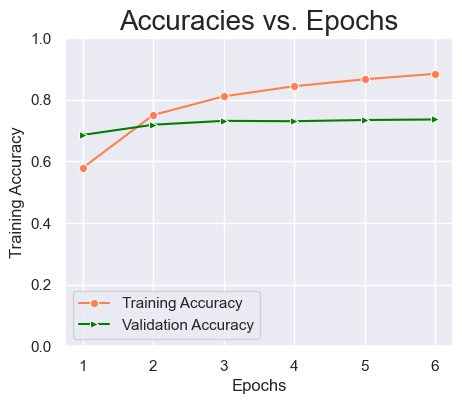

In [24]:
# TODO: Plot the learning curves to visualize training progress
plot_learning_curve(h)

> **🚨 Analysis: The ANN shows clear overfitting!**

**💡 Concept - Overfitting:** 
- **Training accuracy** keeps improving
- **Validation accuracy** plateaus or decreases
- The model memorizes training data instead of learning general patterns

**🔧 Solutions for overfitting:**
- Increase dropout rate
- Add more regularization
- Reduce model complexity
- Get more training data
- Use early stopping (which we already implemented)

In [25]:
# TODO: Evaluate the model on test data
loss, acc = ann_model.evaluate(X_test, y_test)  # Use test data

print(f"🎯 Testing Accuracy: {acc*100:.2f}%")
print(f"📉 Testing Loss: {loss:.4f}")

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7355 - loss: 0.6478
🎯 Testing Accuracy: 73.55%
📉 Testing Loss: 0.6478


**🔽 Dropdown Hint:**
<details>
<summary>Click for help with evaluation</summary>

```python
loss, acc = ann_model.evaluate(X_test, y_test)
```
</details>

## 🎓 **Summary & Next Steps**

**What you've learned:**
- ✅ Text preprocessing and vectorization with TF-IDF
- ✅ Label encoding for categorical targets
- ✅ Building neural networks with TensorFlow/Keras
- ✅ Training with validation splits and early stopping
- ✅ Recognizing overfitting patterns

**Key Takeaways:**
1. **Data preprocessing** is crucial for NLP tasks
2. **Overfitting** is common in neural networks - watch for it!
3. **Early stopping** helps prevent overfitting
4. **Validation curves** help diagnose model performance

**🚀 Challenge Yourself:**
- Try different architectures (more layers, different neuron counts)
- Experiment with different dropout rates
- Compare with other models (Random Forest, SVM)
- Implement k-fold cross-validation